In [1]:
import random
import numpy
import math

import matplotlib.pyplot as plt

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

C:\Users\Péricles\Anaconda3\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


In [2]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [3]:
toolbox = base.Toolbox()
# Attribute generator 
toolbox.register("attr_bool", random.randint, 0, 1)
# Structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual, 
    toolbox.attr_bool, 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [4]:
def my_evaluate(individual):
    
    size = len(individual)
    
    val = 0
    for i in range(size):
        if individual[i] != 0:
          val = val + math.pow(2, size-1 -i)
    return pow(val,2),

In [5]:
toolbox.register("evaluate", my_evaluate)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [6]:
def main():
    random.seed(64)
    
    pop = toolbox.population(n=20)
    hof = tools.HallOfFame(40)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=40, 
                                   stats=stats, halloffame=hof, verbose=True)
    
    return pop, log, hof

In [7]:
def plot(log):
    
    x_values = []
    y_values = []
    
    
    for i in range(len(log)):
        y_values.append(log[i]['avg'])
        x_values.append(log[i]['gen'])
    
    plt.plot(x_values, y_values, 'k')
    plt.yscale('log')
    plt.ylabel('Avg')
    plt.xlabel('Generation')
    plt.show()


gen	nevals	avg   	std   	min 	max   
0  	20    	317145	282246	1156	986049
1  	13    	498898	252411	27889	976144
2  	12    	773870	212187	427716	976144
3  	14    	934053	102519	630436	976144
4  	10    	960588	37518.8	853776	976144
5  	9     	976144	0      	976144	976144
6  	12    	970026	26669.5	853776	976144
7  	13    	975750	1719.15	968256	976144
8  	8     	961411	59462.1	739600	1.0404e+06
9  	12    	970940	56429.1	739600	1.0404e+06
10 	15    	951420	168276 	226576	1.0404e+06
11 	12    	999650	56288.5	795664	1.04448e+06
12 	11    	998065	170283 	258064	1.04448e+06
13 	11    	994861	171292 	258064	1.04448e+06
14 	14    	1.04041e+06	7688.15	1.00802e+06	1.04448e+06
15 	16    	1.00143e+06	170644 	260100     	1.04448e+06
16 	16    	1.04428e+06	890.087	1.0404e+06 	1.04448e+06
17 	13    	1.00903e+06	111838 	580644     	1.04448e+06
18 	16    	1.04418e+06	1334.48	1.03836e+06	1.04448e+06
19 	7     	1.04448e+06	0      	1.04448e+06	1.04448e+06
20 	11    	1.04428e+06	890.087	1.0404e+06 	1.04448e+0

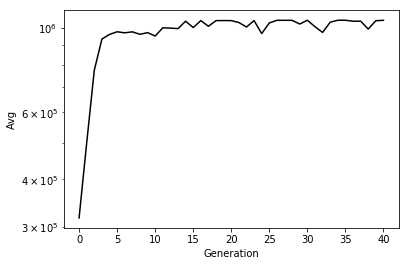

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 0, 1, 1], [1, 1, 1, 1, 1, 1, 1, 0, 1, 0], [1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 1, 1, 0], [1, 1, 1, 1, 1, 1, 0, 1, 0, 1], [1, 1, 1, 1, 1, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 1, 1, 1, 0], [1, 1, 1, 1, 1, 0, 1, 1, 0, 0], [1, 1, 1, 1, 1, 0, 0, 0, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1, 1, 1], [1, 1, 1, 1, 0, 1, 1, 1, 1, 0], [1, 1, 1, 1, 0, 1, 1, 1, 0, 0], [1, 1, 1, 1, 0, 1, 1, 0, 0, 1], [1, 1, 1, 1, 0, 1, 1, 0, 0, 0], [1, 1, 1, 1, 0, 1, 0, 0, 0, 0], [1, 1, 1, 1, 0, 0, 1, 0, 1, 0], [1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1, 1, 1, 1, 1], [1, 1, 1, 0, 1, 1, 1, 1, 0, 0], [1, 1, 1, 0, 0, 1, 1, 1, 0, 0], [1, 1, 0, 1, 1, 1, 1, 1, 1, 1], [1, 1, 0, 1, 1, 1, 1, 1, 1, 0], [1, 1, 0, 1, 1, 1, 1, 1, 0, 0], [1, 1, 0, 1, 0, 1, 1, 1, 0, 0], [1, 1, 0, 0, 0, 1, 1, 0, 1, 0], [1, 1, 0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 

In [8]:
if __name__ == "__main__":
    results = main()
    
    
    plot(results[1])
    
    print(results[2])